# GSEApy - Gene Set Enrichment Analysis

In [1]:
import gseapy as gp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
from gseapy import Msigdb
from gseapy import dotplot

## Use the *Prerank* function

Analysis used to determine whether a predefined set of genes (gene sets) shows statistically significant differences in expression in a ranked list of genes.

### 1. 4A genes from XGBoost

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/GSEA_prerank_dataset")
rnk_4A_xgb = pd.read_csv("4A_XGBoost_GSEA_prerank_dataset.rnk", header=None, index_col=0, sep="\t")
rnk_4A_xgb.head()

,1
0,
TP53,0.517394
PIK3CA,0.211388
MAP3K1,0.149722
GATA3,0.094592
AKT1,0.080218


In [3]:
rnk_4A_xgb

,1
0,
TP53,0.517394
PIK3CA,0.211388
MAP3K1,0.149722
GATA3,0.094592
AKT1,0.080218
...,...
IBSP,0.000000
ICOSLG,0.000000
IL24,0.000000


In [4]:
rnk_4A_xgb.shape

(304, 1)

### Mutational Signature Database 

In [5]:
# # run prerank
# # enrichr libraries are supported by prerank module. Just provide the name
# # use 4 process to acceralate the permutation speed
pre_res_4A_xgb_msigDB = gp.prerank(rnk=rnk_4A_xgb, 
                     gene_sets=['MSigDB_Computational', 'MSigDB_Oncogenic_Signatures'],
                     threads=4,
                     min_size=5,
                     max_size=10000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2024-03-25 16:35:35,248 [WARNING] Duplicated values found in preranked stats: 85.20% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-25 16:35:35,248 [INFO] Parsing data files for GSEA.............................
2024-03-25 16:35:35,249 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:35,270 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:35,308 [INFO] 0907 gene_sets have been filtered out when max_size=10000 and min_size=5
2024-03-25 16:35:35,310 [INFO] 0140 gene_sets used for further statistical testing.....
2024-03-25 16:35:35,311 [INFO] Start to run GSEA...Might take a while..................
2024-03-25 16:35:35,475 [INFO] Congratulations. GSEApy runs successfully................



*Duplicated values found in preranked stats: 85.20% of genes*: it means that multiple genes in the list have the same rank. This situation can potentially impact the results of the gene set enrichment analysis (GSEA) because, when genes have the same rank, their order in the analysis is arbitrary.

In GSEA, the enrichment score is calculated by walking down the ranked gene list, and the score increases when a gene in the gene set is encountered and decreases otherwise. When genes have the same rank, their order in the list doesn't uniquely determine which one comes first, and this can lead to multiple valid paths for calculating the enrichment score. As a result, the analysis might be influenced by the specific order of duplicated genes in your list.

In [6]:
pre_res_4A_xgb_msigDB.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,MSigDB_Oncogenic_Signatures__DCA UP.V1 DN,-0.434783,-1.474312,0.155172,1.0,0.978,5/5,100.00%,MATN4;MYL10;MSH5;MED23;HIST1H3D
1,prerank,MSigDB_Oncogenic_Signatures__KRAS.600 UP.V1 UP,-0.364548,-1.253,0.237885,1.0,0.999,5/5,100.00%,TBX3;NME5;PTGS2;MAP4K1;GLDC
2,prerank,MSigDB_Oncogenic_Signatures__ESC V6.5 UP LATE....,-0.341137,-1.164727,0.292473,1.0,1.0,5/5,100.00%,ACACB;KLF4;FASTKD2;AP4M1;FAM208B
3,prerank,MSigDB_Computational__MODULE 11,-0.296296,-1.122275,0.300319,1.0,1.0,7/7,100.00%,TNC;STAT2;PRKCZ;KIF1B;FGFR2;ERBB3;EFS
4,prerank,MSigDB_Computational__MODULE 188,1.0,1.079764,0.009868,0.552044,0.373,1/6,0.33%,TP53


In [7]:
enrich_results_4A_xgb_msigDB = pre_res_4A_xgb_msigDB.res2d
enrich_results_4A_xgb_msigDB

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,MSigDB_Oncogenic_Signatures__DCA UP.V1 DN,-0.434783,-1.474312,0.155172,1.0,0.978,5/5,100.00%,MATN4;MYL10;MSH5;MED23;HIST1H3D
1,prerank,MSigDB_Oncogenic_Signatures__KRAS.600 UP.V1 UP,-0.364548,-1.253,0.237885,1.0,0.999,5/5,100.00%,TBX3;NME5;PTGS2;MAP4K1;GLDC
2,prerank,MSigDB_Oncogenic_Signatures__ESC V6.5 UP LATE....,-0.341137,-1.164727,0.292473,1.0,1.0,5/5,100.00%,ACACB;KLF4;FASTKD2;AP4M1;FAM208B
3,prerank,MSigDB_Computational__MODULE 11,-0.296296,-1.122275,0.300319,1.0,1.0,7/7,100.00%,TNC;STAT2;PRKCZ;KIF1B;FGFR2;ERBB3;EFS
4,prerank,MSigDB_Computational__MODULE 188,1.0,1.079764,0.009868,0.552044,0.373,1/6,0.33%,TP53
...,...,...,...,...,...,...,...,...,...,...
135,prerank,MSigDB_Computational__MORF SOD1,-0.147651,-0.549766,1.0,1.0,1.0,6/6,100.00%,SLC4A2;SEC13;ILF2;EIF3C;MTHFD1;ACLY
136,prerank,MSigDB_Computational__MODULE 235,-0.150502,-0.527617,0.986755,1.0,1.0,5/5,100.00%,CYP3A4;HPD;MTHFD1;AKR1C3;ATP8B1
137,prerank,MSigDB_Computational__MORF EIF3S2,-0.147157,-0.51059,1.0,1.0,1.0,5/5,100.00%,DAP3;SLC4A2;ILF2;HSP90B1;ACLY
138,prerank,MSigDB_Computational__MORF RAN,-0.147157,-0.501897,1.0,1.0,1.0,5/5,100.00%,DAP3;RPL5;ILF2;EIF3C;ACLY


### GSEApy results - 4A XGBoost - FDR q-value < 0.75

In [8]:
enrich_results_4A_xgb_q075_msigDB = enrich_results_4A_xgb_msigDB.loc[enrich_results_4A_xgb_msigDB['FDR q-val']<0.75]
enrich_results_4A_xgb_q075_msigDB

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
4,prerank,MSigDB_Computational__MODULE 188,1.0,1.079764,0.009868,0.552044,0.373,1/6,0.33%,TP53
5,prerank,MSigDB_Computational__MODULE 145,1.0,1.079764,0.009868,0.552044,0.373,1/6,0.33%,TP53
6,prerank,MSigDB_Computational__MODULE 15,1.0,1.077781,0.006831,0.61163,0.538,1/8,0.33%,TP53
7,prerank,MSigDB_Computational__MODULE 179,0.995594,1.076988,0.027473,0.539689,0.599,1/8,0.33%,TP53
8,prerank,MSigDB_Oncogenic_Signatures__GCNP SHH UP LATE....,0.99661,1.076376,0.022193,0.490216,0.648,1/9,0.66%,PIK3CA
...,...,...,...,...,...,...,...,...,...,...
89,prerank,MSigDB_Computational__MODULE 67,0.926174,0.998058,0.519355,0.605882,1.0,1/6,7.57%,SMG1
90,prerank,MSigDB_Oncogenic_Signatures__TBK1.DF DN,0.918644,0.992678,0.526178,0.642786,1.0,3/9,8.88%,NF1;SMG1;CBFB
91,prerank,MSigDB_Computational__MORF XRCC5,0.912752,0.987961,0.583871,0.672263,1.0,1/6,8.88%,CBFB
92,prerank,MSigDB_Computational__MORF GNB1,0.913043,0.98652,0.585009,0.676883,1.0,1/5,8.88%,CBFB


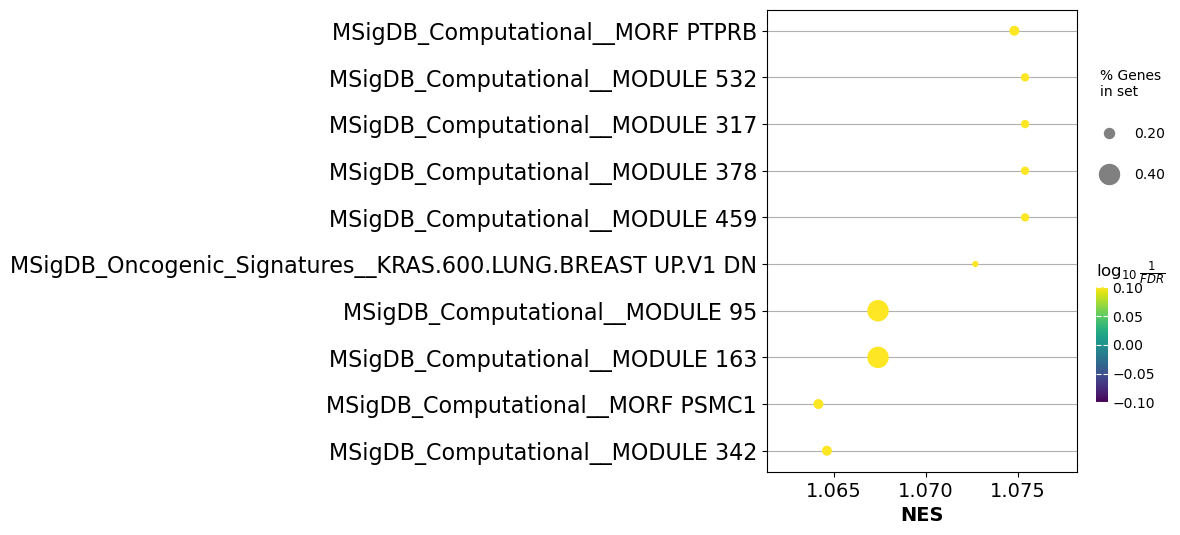

In [9]:
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(enrich_results_4A_xgb_q075_msigDB,
             column="FDR q-val",
             #title='KEGG_2016',
             cmap=plt.cm.viridis, # colormap to be used for coloring the dots
             size=6, # adjust dot size
             figsize=(5,6), cutoff=0.75, show_ring=False)
# only the gene sets with a significance level below 'cutoff' will be shown
# each dot represents a gene set, and the color and size of the dots convey information about the significance and strength of enrichment

In [10]:
enrich_results_4A_xgb_q075_msigDB_2 = enrich_results_4A_xgb_q075_msigDB.set_index('Term')
enrich_results_4A_xgb_q075_msigDB_2

,Name,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
Term,,,,,,,,,
MSigDB_Computational__MODULE 188,prerank,1.0,1.079764,0.009868,0.552044,0.373,1/6,0.33%,TP53
MSigDB_Computational__MODULE 145,prerank,1.0,1.079764,0.009868,0.552044,0.373,1/6,0.33%,TP53
MSigDB_Computational__MODULE 15,prerank,1.0,1.077781,0.006831,0.61163,0.538,1/8,0.33%,TP53
MSigDB_Computational__MODULE 179,prerank,0.995594,1.076988,0.027473,0.539689,0.599,1/8,0.33%,TP53
MSigDB_Oncogenic_Signatures__GCNP SHH UP LATE.V1 UP,prerank,0.99661,1.076376,0.022193,0.490216,0.648,1/9,0.66%,PIK3CA
...,...,...,...,...,...,...,...,...,...
MSigDB_Computational__MODULE 67,prerank,0.926174,0.998058,0.519355,0.605882,1.0,1/6,7.57%,SMG1
MSigDB_Oncogenic_Signatures__TBK1.DF DN,prerank,0.918644,0.992678,0.526178,0.642786,1.0,3/9,8.88%,NF1;SMG1;CBFB
MSigDB_Computational__MORF XRCC5,prerank,0.912752,0.987961,0.583871,0.672263,1.0,1/6,8.88%,CBFB


In [11]:
### CREATE AN OCCURRENCE MATRIX WHERE THERE IS THE COUNT FOR EACH GENE OF HOW MANY TIMES IT IS PRESENT IN A GENE SET
### !! bozza

# Extract relevant columns from the dataframe
gene_sets_4Axgb_q075_msigDB = enrich_results_4A_xgb_q075_msigDB_2.index.tolist()
enriched_genes_series_4Axgb_q075_msigDB = enrich_results_4A_xgb_q075_msigDB['Lead_genes']

# Create a list to store all unique genes
all_genes_4Axgb_q075_msigDB = []

# Populate the list with genes from each gene set
for enriched_genes in enriched_genes_series_4Axgb_q075_msigDB:
    enriched_genes_list_4Axgb_q075_msigDB = enriched_genes.split(';') if isinstance(enriched_genes, str) else []
    all_genes_4Axgb_q075_msigDB.extend(enriched_genes_list_4Axgb_q075_msigDB)

# Deduplicate genes
all_genes_4Axgb_q075_msigDB = list(set(all_genes_4Axgb_q075_msigDB))

# Create an empty dataframe for the occurrence matrix
occurrence_matrix_4Axgb_q075_msigDB = pd.DataFrame(index=all_genes_4Axgb_q075_msigDB, columns=gene_sets_4Axgb_q075_msigDB)

# Populate the occurrence matrix with binary values
for gene_set, enriched_genes in zip(gene_sets_4Axgb_q075_msigDB, enriched_genes_series_4Axgb_q075_msigDB):
    enriched_genes_list_4Axgb_q075_msigDB = enriched_genes.split(';') if isinstance(enriched_genes, str) else []
    occurrence_matrix_4Axgb_q075_msigDB.loc[enriched_genes_list_4Axgb_q075_msigDB, gene_set] = 1

# Fill NaN values with 0
occurrence_matrix_4Axgb_q075_msigDB = occurrence_matrix_4Axgb_q075_msigDB.fillna(0)

# Convert the dataframe to an integer type
occurrence_matrix_4Axgb_q075_msigDB = occurrence_matrix_4Axgb_q075_msigDB.astype(int)

# Print or use the occurrence matrix as needed
print(occurrence_matrix_4Axgb_q075_msigDB)

        MSigDB_Computational__MODULE 188  MSigDB_Computational__MODULE 145  \
ITPR3                                  0                                 0   
TP53                                   1                                 1   
PTEN                                   0                                 0   
MAP3K1                                 0                                 0   
GATA3                                  0                                 0   
PIK3CA                                 0                                 0   
MAP2K4                                 0                                 0   
BRCA1                                  0                                 0   
ERBB2                                  0                                 0   
SZT2                                   0                                 0   
CBFB                                   0                                 0   
AKT1                                   0                        

In [12]:
occurrence_matrix_4Axgb_q075_msigDB

,MSigDB_Computational__MODULE 188,MSigDB_Computational__MODULE 145,MSigDB_Computational__MODULE 15,MSigDB_Computational__MODULE 179,MSigDB_Oncogenic_Signatures__GCNP SHH UP LATE.V1 UP,MSigDB_Computational__MODULE 255,MSigDB_Computational__MODULE 237,MSigDB_Computational__MODULE 459,MSigDB_Computational__MODULE 378,MSigDB_Computational__MODULE 317,...,MSigDB_Computational__MORF RAP1A,MSigDB_Computational__MORF ESR1,MSigDB_Computational__MORF PSMF1,MSigDB_Computational__MORF RUNX1,MSigDB_Oncogenic_Signatures__HOXA9 DN.V1 DN,MSigDB_Computational__MODULE 67,MSigDB_Oncogenic_Signatures__TBK1.DF DN,MSigDB_Computational__MORF XRCC5,MSigDB_Computational__MORF GNB1,MSigDB_Computational__MODULE 98
ITPR3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TP53,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
PTEN,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
MAP3K1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GATA3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PIK3CA,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MAP2K4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRCA1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
ERBB2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SZT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# how many times is a specific gene significantly enriched in a specific pathway?
occurrence_matrix_4Axgb_q075_msigDB_genes = occurrence_matrix_4Axgb_q075_msigDB.sum(axis=1)
occurrence_matrix_4Axgb_q075_msigDB_genes

ITPR3      6
TP53      15
PTEN       9
MAP3K1     9
GATA3      9
PIK3CA     2
MAP2K4     2
BRCA1     23
ERBB2      6
SZT2       3
CBFB       3
AKT1       6
NOTCH2     2
VWF       12
COL4A2     2
RB1        5
NF1       18
SMG1      10
dtype: int64

In [14]:
occurrence_matrix_4Axgb_q075_msigDB_genes_df = occurrence_matrix_4Axgb_q075_msigDB_genes.to_frame(name='EnrichmentCount')
occurrence_matrix_4Axgb_q075_msigDB_genes_df

,EnrichmentCount
ITPR3,6
TP53,15
PTEN,9
MAP3K1,9
GATA3,9
PIK3CA,2
MAP2K4,2
BRCA1,23
ERBB2,6
SZT2,3


In [15]:
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted = occurrence_matrix_4Axgb_q075_msigDB_genes_df.sort_values(by='EnrichmentCount', ascending=False)
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted

,EnrichmentCount
BRCA1,23
NF1,18
TP53,15
VWF,12
SMG1,10
PTEN,9
MAP3K1,9
GATA3,9
AKT1,6
ITPR3,6


In [16]:
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted.shape

(18, 1)

In [17]:
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted['EnrichmentCount']

BRCA1     23
NF1       18
TP53      15
VWF       12
SMG1      10
PTEN       9
MAP3K1     9
GATA3      9
AKT1       6
ITPR3      6
ERBB2      6
RB1        5
CBFB       3
SZT2       3
NOTCH2     2
MAP2K4     2
COL4A2     2
PIK3CA     2
Name: EnrichmentCount, dtype: int64

In [18]:
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted.index

Index(['BRCA1', 'NF1', 'TP53', 'VWF', 'SMG1', 'PTEN', 'MAP3K1', 'GATA3',
       'AKT1', 'ITPR3', 'ERBB2', 'RB1', 'CBFB', 'SZT2', 'NOTCH2', 'MAP2K4',
       'COL4A2', 'PIK3CA'],
      dtype='object')

In [19]:
lead_genes_4Axgb_q075_msigDB = np.arange(0,18,1)
enrichment_count_4Axgb_q075_msigDB = occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted[['EnrichmentCount']].to_numpy()

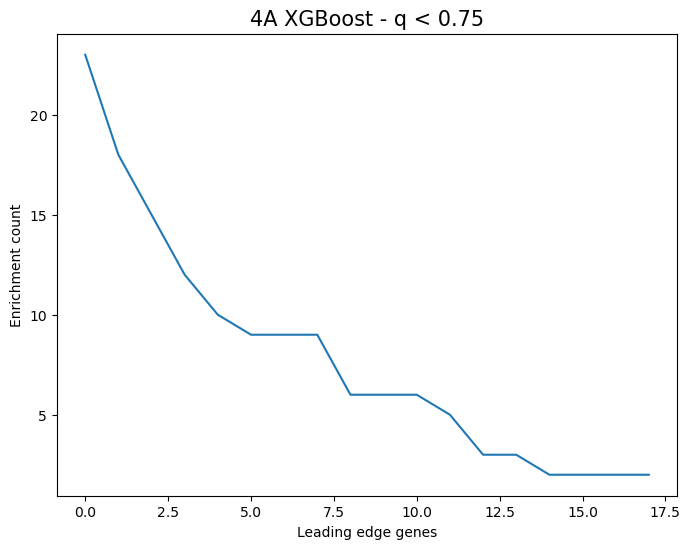

In [20]:
plt.rcParams['figure.figsize'] = (8, 6)
#plt.yscale("log") 
#set axes limit
#plt.ylim(0.001, 1000)
plt.plot(lead_genes_4Axgb_q075_msigDB, enrichment_count_4Axgb_q075_msigDB)
plt.xlabel("Leading edge genes", fontsize=10)
plt.ylabel("Enrichment count", fontsize=10)
plt.title("4A XGBoost - q < 0.75", fontsize=15)
plt.show()

In [21]:
mutated_gene_names_4A_xgb_q075_msigDB = occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted.index.tolist()

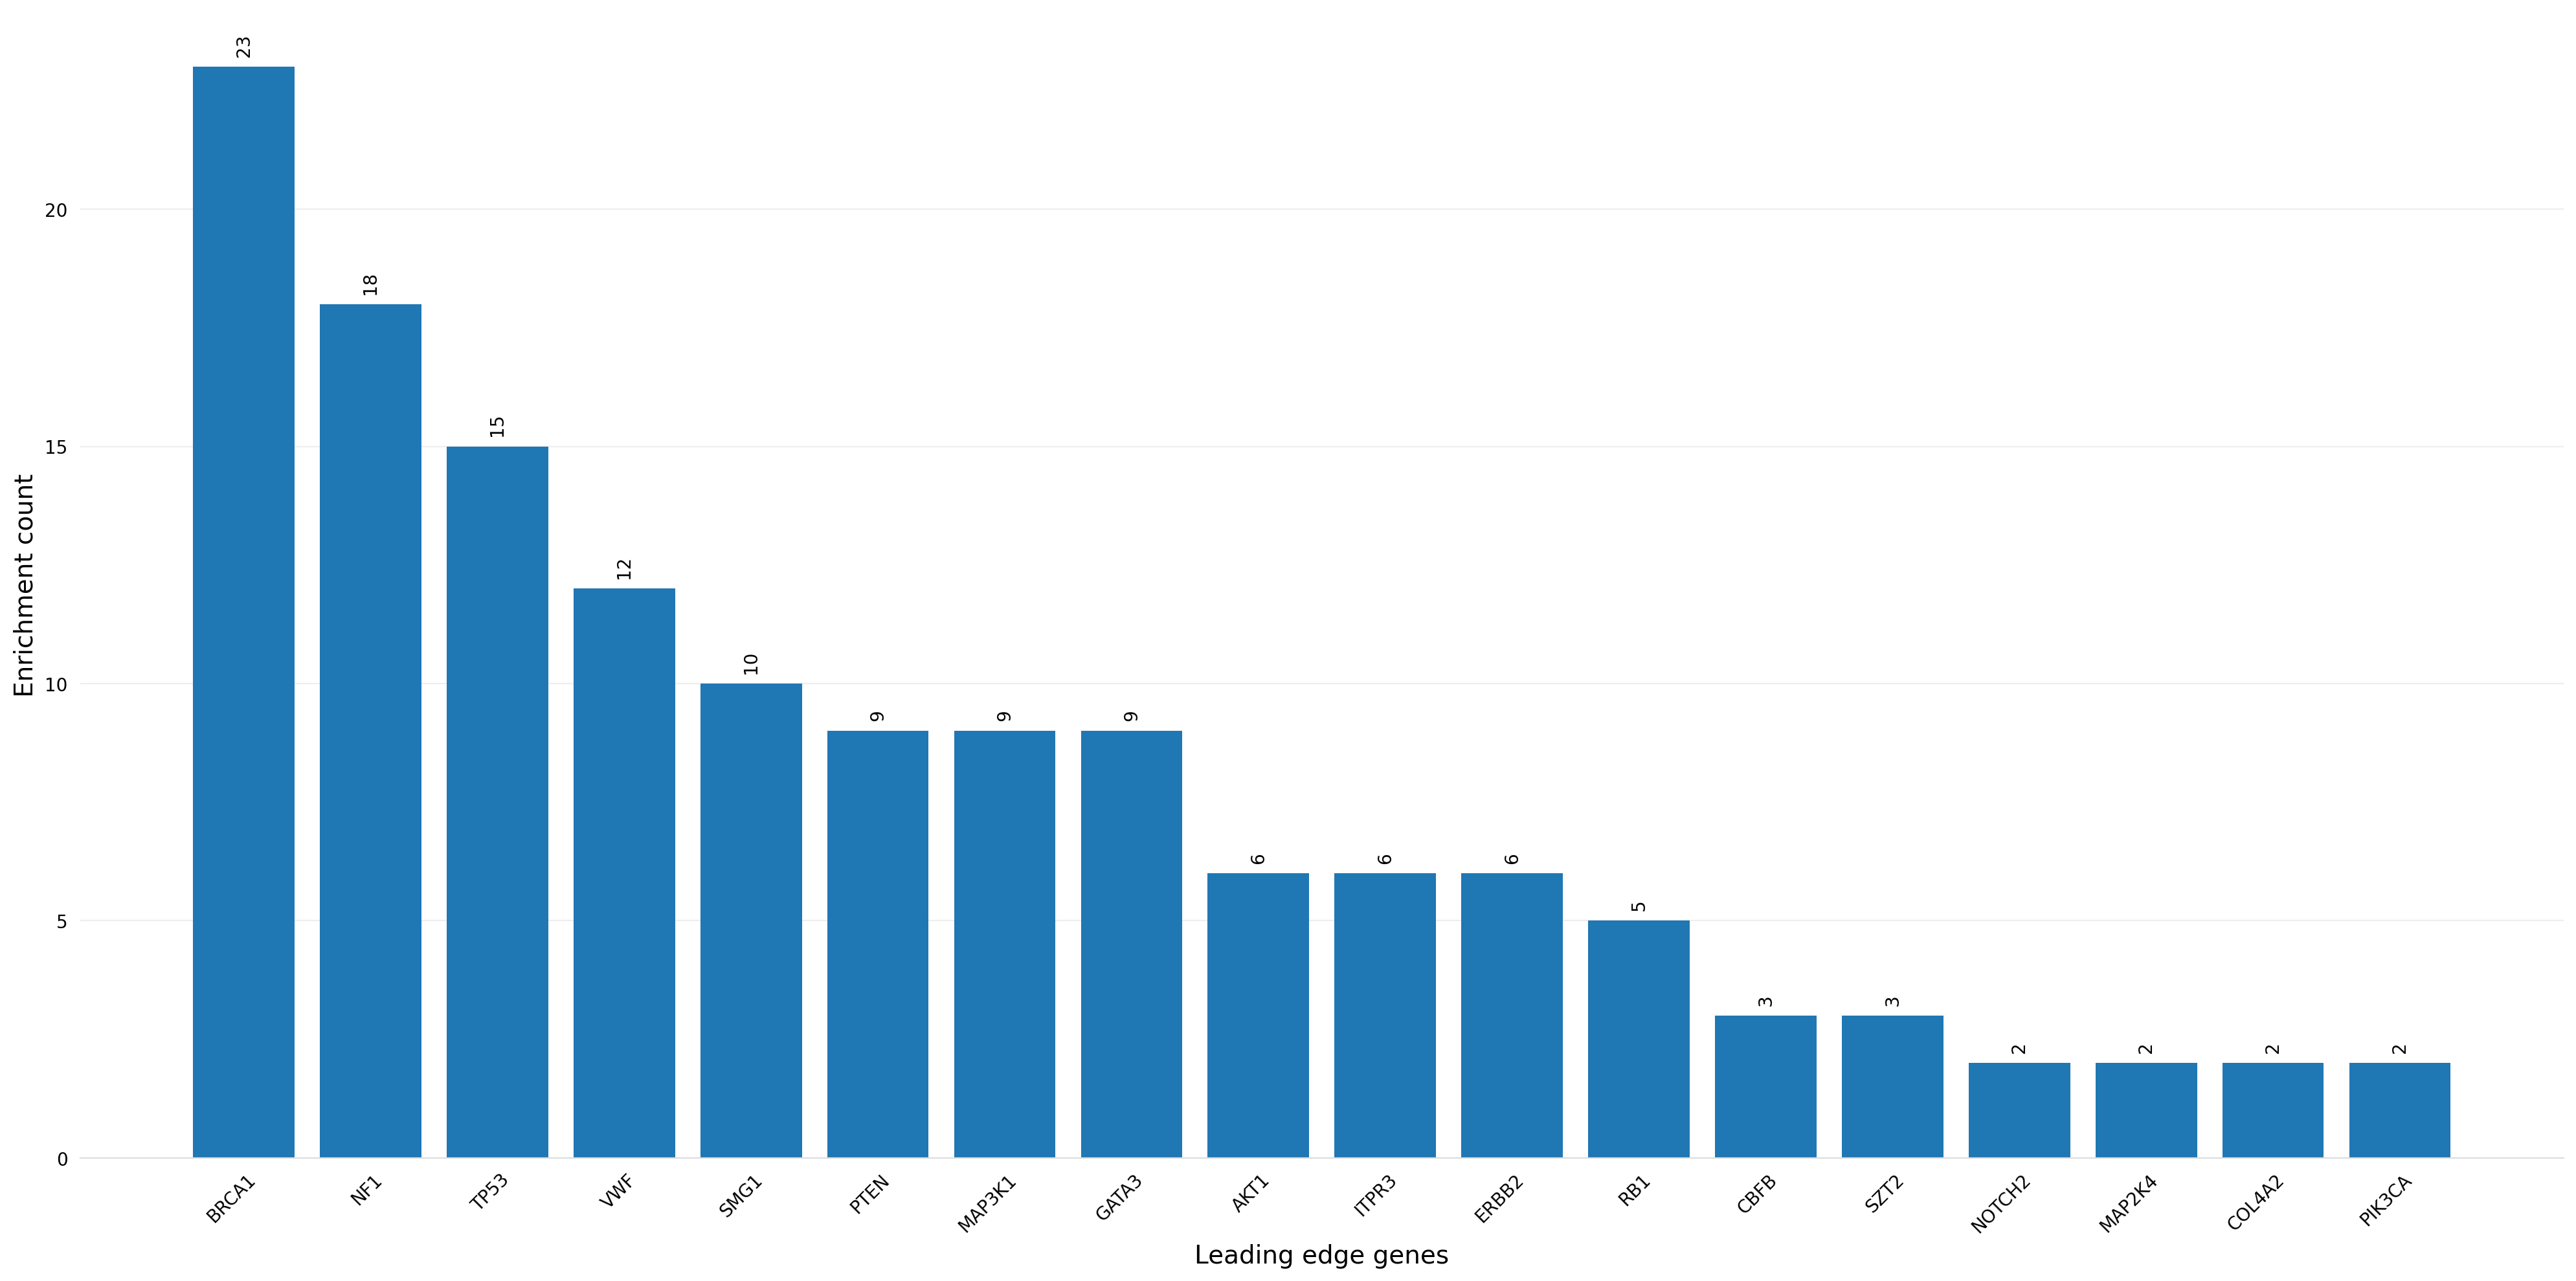

In [22]:
# increase the quality and resolution of the chart
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina', quality=100)
# set default figure size.
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
h=ax.bar(occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted.index, occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted['EnrichmentCount'], label=mutated_gene_names_4A_xgb_q075_msigDB)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names_4A_xgb_q075_msigDB,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Leading edge genes', fontsize=14)
plt.ylabel('Enrichment count', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

### KEGG, Reactome, Wikipathway

In [23]:
# # run prerank
# # enrichr libraries are supported by prerank module. Just provide the name
# # use 4 process to acceralate the permutation speed
pre_res_4A_xgb_KEGG_react_wiki = gp.prerank(rnk=rnk_4A_xgb, 
                     gene_sets=['KEGG_2021_Human', 'Reactome_2022', 'WikiPathway_2023_Human'],
                     threads=4,
                     min_size=5,
                     max_size=10000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2024-03-25 16:35:37,266 [WARNING] Duplicated values found in preranked stats: 85.20% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-25 16:35:37,268 [INFO] Parsing data files for GSEA.............................
2024-03-25 16:35:37,269 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:37,277 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:37,306 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:37,357 [INFO] 2573 gene_sets have been filtered out when max_size=10000 and min_size=5
2024-03-25 16:35:37,358 [INFO] 0366 gene_sets used for further statistical testing.....
2024-03-25 16:35:37,358 [INFO] Start to run GSEA...Might take a while..................
2024-03-25 16:35:37,760 [INFO] Congratulations. GSEApy runs successfully

*Duplicated values found in preranked stats: 85.20% of genes*: it means that multiple genes in the list have the same rank. This situation can potentially impact the results of the gene set enrichment analysis (GSEA) because, when genes have the same rank, their order in the analysis is arbitrary.

In GSEA, the enrichment score is calculated by walking down the ranked gene list, and the score increases when a gene in the gene set is encountered and decreases otherwise. When genes have the same rank, their order in the list doesn't uniquely determine which one comes first, and this can lead to multiple valid paths for calculating the enrichment score. As a result, the analysis might be influenced by the specific order of duplicated genes in your list.

In [24]:
pre_res_4A_xgb_KEGG_react_wiki.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Reactome_2022__mRNA Splicing R-HSA-72172,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
1,prerank,KEGG_2021_Human__Spliceosome,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
2,prerank,Reactome_2022__mRNA Splicing - Major Pathway R...,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
3,prerank,Reactome_2022__SLC-mediated Transmembrane Tran...,-0.648829,-2.219809,0.006928,0.06255,0.475,5/5,100.00%,SLC26A9;SLC28A2;SLC6A11;RUNX1;SLC4A2
4,prerank,Reactome_2022__Mitotic Anaphase R-HSA-68882,-0.578595,-2.058595,0.025263,0.076675,0.627,5/5,100.00%,ZW10;RCC2;NUP93;SEC13;STAG2


In [25]:
enrich_results_4A_xgb_KEGG_react_wiki = pre_res_4A_xgb_KEGG_react_wiki.res2d
enrich_results_4A_xgb_KEGG_react_wiki

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Reactome_2022__mRNA Splicing R-HSA-72172,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
1,prerank,KEGG_2021_Human__Spliceosome,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
2,prerank,Reactome_2022__mRNA Splicing - Major Pathway R...,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
3,prerank,Reactome_2022__SLC-mediated Transmembrane Tran...,-0.648829,-2.219809,0.006928,0.06255,0.475,5/5,100.00%,SLC26A9;SLC28A2;SLC6A11;RUNX1;SLC4A2
4,prerank,Reactome_2022__Mitotic Anaphase R-HSA-68882,-0.578595,-2.058595,0.025263,0.076675,0.627,5/5,100.00%,ZW10;RCC2;NUP93;SEC13;STAG2
...,...,...,...,...,...,...,...,...,...,...
361,prerank,KEGG_2021_Human__TGF-beta signaling pathway,-0.170569,-0.592095,0.858427,1.0,1.0,5/5,100.00%,TFDP1;SMAD4;EP300;E2F4;ACVR2A
362,prerank,KEGG_2021_Human__Thermogenesis,-0.157191,-0.546726,0.938947,1.0,1.0,5/5,100.00%,NDUFB6;TSC1;UQCR10;KRAS;ARID1A
363,prerank,Reactome_2022__Autophagy R-HSA-9612973,-0.153846,-0.530878,0.97234,1.0,1.0,5/5,100.00%,TSC1;PLIN2;CFTR;ATG4C;ATM
364,prerank,Reactome_2022__Macroautophagy R-HSA-1632852,-0.153846,-0.530878,0.97234,1.0,1.0,5/5,100.00%,TSC1;PLIN2;CFTR;ATG4C;ATM


### GSEApy results - 4A XGBoost - FDR q-value < 0.75

In [26]:
enrich_results_4A_xgb_q075_KEGG_react_wiki = enrich_results_4A_xgb_KEGG_react_wiki.loc[enrich_results_4A_xgb_KEGG_react_wiki['FDR q-val']<0.75]
enrich_results_4A_xgb_q075_KEGG_react_wiki

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Reactome_2022__mRNA Splicing R-HSA-72172,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
1,prerank,KEGG_2021_Human__Spliceosome,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
2,prerank,Reactome_2022__mRNA Splicing - Major Pathway R...,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
3,prerank,Reactome_2022__SLC-mediated Transmembrane Tran...,-0.648829,-2.219809,0.006928,0.06255,0.475,5/5,100.00%,SLC26A9;SLC28A2;SLC6A11;RUNX1;SLC4A2
4,prerank,Reactome_2022__Mitotic Anaphase R-HSA-68882,-0.578595,-2.058595,0.025263,0.076675,0.627,5/5,100.00%,ZW10;RCC2;NUP93;SEC13;STAG2
...,...,...,...,...,...,...,...,...,...,...
315,prerank,WikiPathway_2023_Human__TROP2 Regulatory Signa...,0.912752,0.985607,0.577107,0.664536,1.0,3/6,9.54%,RB1;PTEN;PIK3R1
316,prerank,Reactome_2022__NR1H2 And NR1H3-mediated Signal...,0.909396,0.983851,0.605723,0.674172,1.0,1/6,9.21%,AGO1
317,prerank,Reactome_2022__NR1H3 And NR1H2 Regulate Gene E...,0.909396,0.983851,0.605723,0.674172,1.0,1/6,9.21%,AGO1
318,prerank,WikiPathway_2023_Human__Modulators Of TCR Sign...,0.913043,0.983709,0.597122,0.6733,1.0,3/5,9.54%,AKT1;AGO1;PIK3R1


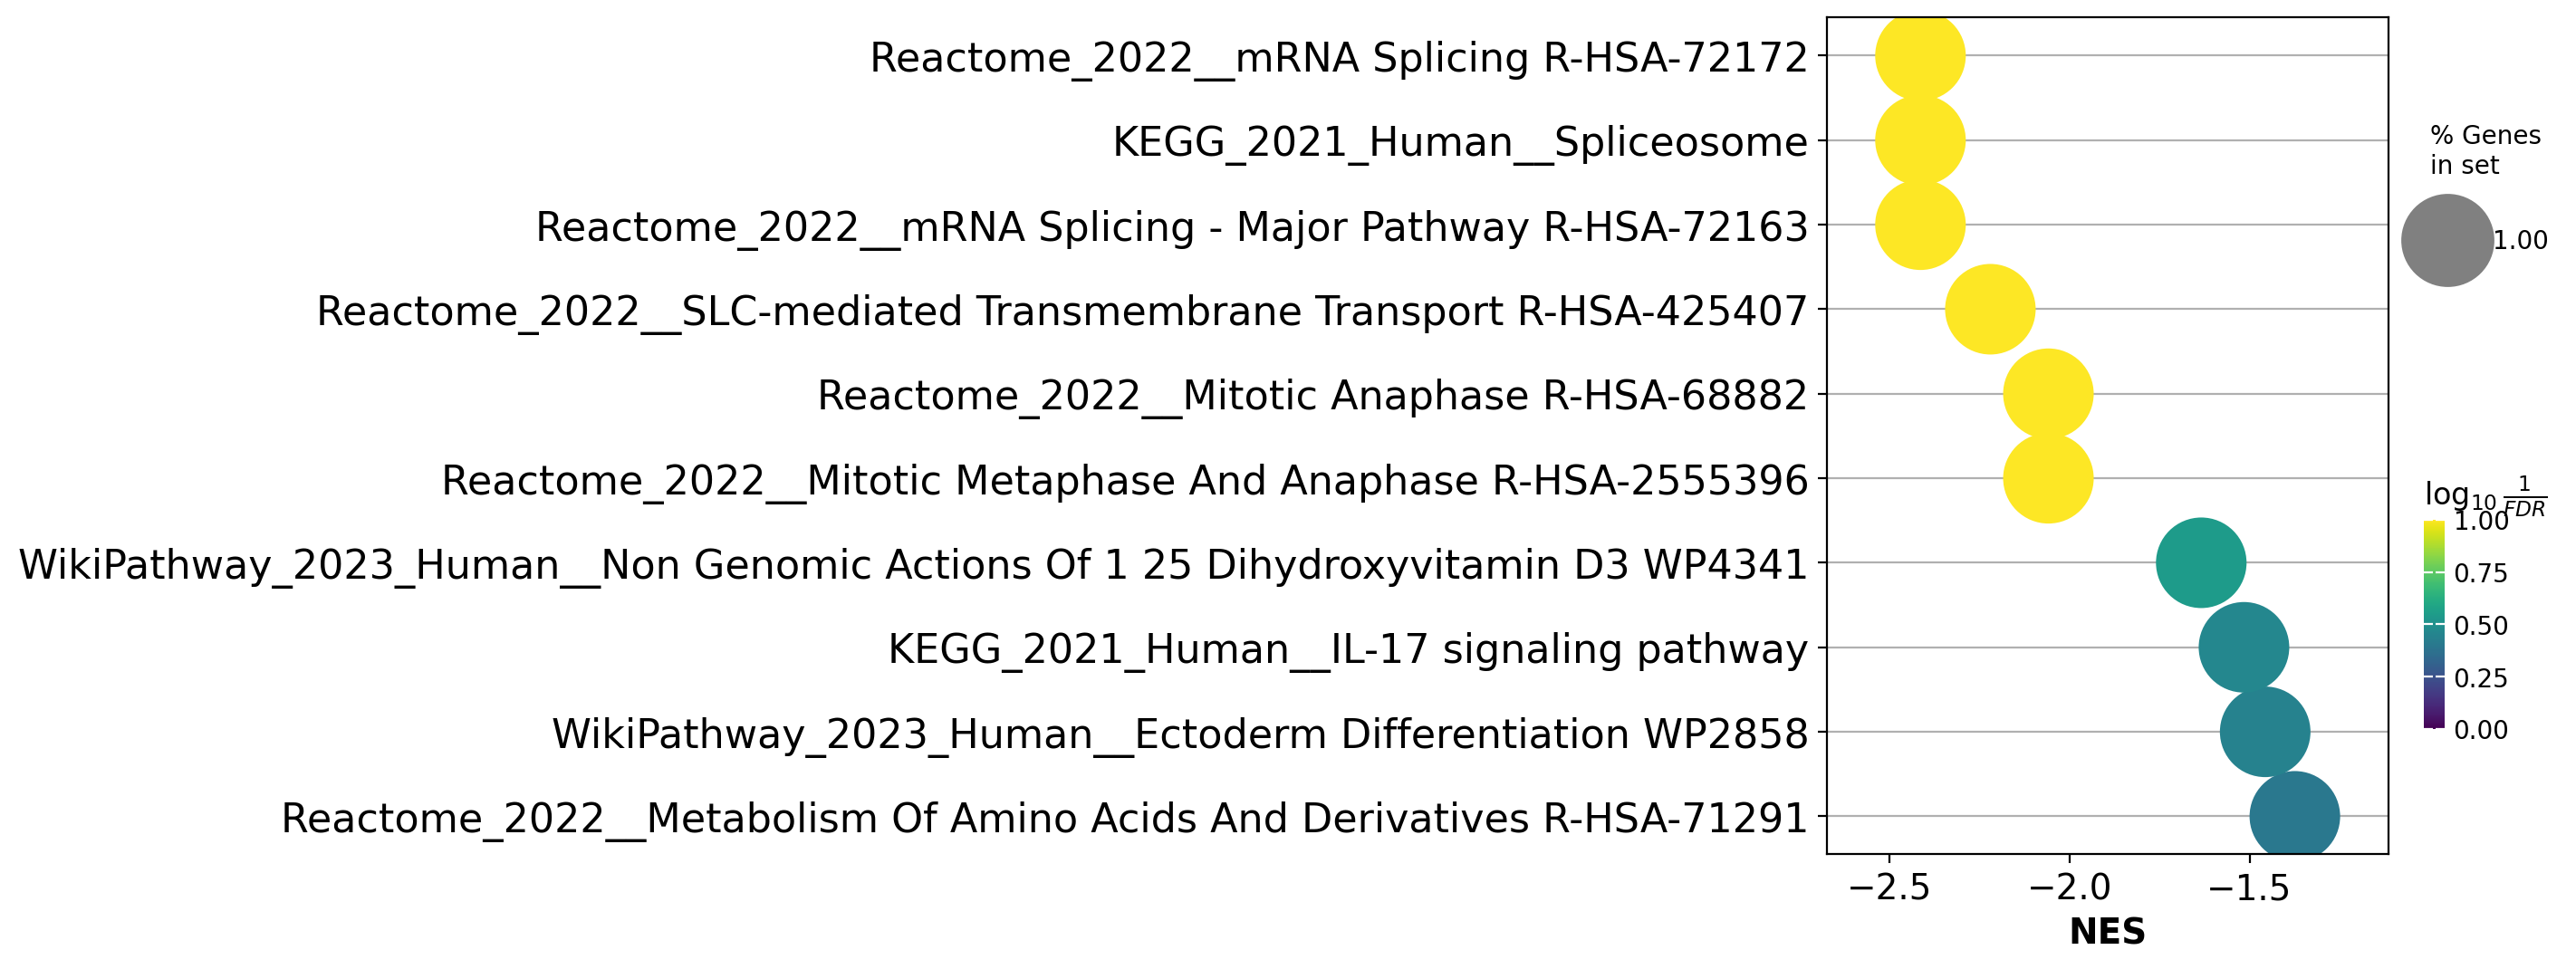

In [27]:
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(enrich_results_4A_xgb_q075_KEGG_react_wiki,
             column="FDR q-val",
             #title='KEGG_2016',
             cmap=plt.cm.viridis, # colormap to be used for coloring the dots
             size=6, # adjust dot size
             figsize=(5,6), cutoff=0.75, show_ring=False)
# only the gene sets with a significance level below 'cutoff' will be shown
# each dot represents a gene set, and the color and size of the dots convey information about the significance and strength of enrichment

In [28]:
enrich_results_4A_xgb_q075_KEGG_react_wiki_2 = enrich_results_4A_xgb_q075_KEGG_react_wiki.set_index('Term')
enrich_results_4A_xgb_q075_KEGG_react_wiki_2

,Name,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
Term,,,,,,,,,
Reactome_2022__mRNA Splicing R-HSA-72172,prerank,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
KEGG_2021_Human__Spliceosome,prerank,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
Reactome_2022__mRNA Splicing - Major Pathway R-HSA-72163,prerank,-0.682274,-2.413924,0.008639,0.035689,0.267,5/5,100.00%,SF3B4;SF3B3;WBP11;TRA2B;SF3B1
Reactome_2022__SLC-mediated Transmembrane Transport R-HSA-425407,prerank,-0.648829,-2.219809,0.006928,0.06255,0.475,5/5,100.00%,SLC26A9;SLC28A2;SLC6A11;RUNX1;SLC4A2
Reactome_2022__Mitotic Anaphase R-HSA-68882,prerank,-0.578595,-2.058595,0.025263,0.076675,0.627,5/5,100.00%,ZW10;RCC2;NUP93;SEC13;STAG2
...,...,...,...,...,...,...,...,...,...
WikiPathway_2023_Human__TROP2 Regulatory Signaling WP5300,prerank,0.912752,0.985607,0.577107,0.664536,1.0,3/6,9.54%,RB1;PTEN;PIK3R1
Reactome_2022__NR1H2 And NR1H3-mediated Signaling R-HSA-9024446,prerank,0.909396,0.983851,0.605723,0.674172,1.0,1/6,9.21%,AGO1
Reactome_2022__NR1H3 And NR1H2 Regulate Gene Expression Linked To Cholesterol Transport And Efflux R-HSA-9029569,prerank,0.909396,0.983851,0.605723,0.674172,1.0,1/6,9.21%,AGO1


In [29]:
### CREATE AN OCCURRENCE MATRIX WHERE THERE IS THE COUNT FOR EACH GENE OF HOW MANY TIMES IT IS PRESENT IN A GENE SET
### !! bozza

# Extract relevant columns from the dataframe
gene_sets_4Axgb_q075_KEGG_react_wiki = enrich_results_4A_xgb_q075_KEGG_react_wiki_2.index.tolist()
enriched_genes_series_4Axgb_q075_KEGG_react_wiki = enrich_results_4A_xgb_q075_KEGG_react_wiki['Lead_genes']

# Create a list to store all unique genes
all_genes_4Axgb_q075_KEGG_react_wiki = []

# Populate the list with genes from each gene set
for enriched_genes in enriched_genes_series_4Axgb_q075_KEGG_react_wiki:
    enriched_genes_list_4Axgb_q075_KEGG_react_wiki = enriched_genes.split(';') if isinstance(enriched_genes, str) else []
    all_genes_4Axgb_q075_KEGG_react_wiki.extend(enriched_genes_list_4Axgb_q075_KEGG_react_wiki)

# Deduplicate genes
all_genes_4Axgb_q075_KEGG_react_wiki = list(set(all_genes_4Axgb_q075_KEGG_react_wiki))

# Create an empty dataframe for the occurrence matrix
occurrence_matrix_4Axgb_q075_KEGG_react_wiki = pd.DataFrame(index=all_genes_4Axgb_q075_KEGG_react_wiki, columns=gene_sets_4Axgb_q075_KEGG_react_wiki)

# Populate the occurrence matrix with binary values
for gene_set, enriched_genes in zip(gene_sets_4Axgb_q075_KEGG_react_wiki, enriched_genes_series_4Axgb_q075_KEGG_react_wiki):
    enriched_genes_list_4Axgb_q075_KEGG_react_wiki = enriched_genes.split(';') if isinstance(enriched_genes, str) else []
    occurrence_matrix_4Axgb_q075_KEGG_react_wiki.loc[enriched_genes_list_4Axgb_q075_KEGG_react_wiki, gene_set] = 1

# Fill NaN values with 0
occurrence_matrix_4Axgb_q075_KEGG_react_wiki = occurrence_matrix_4Axgb_q075_KEGG_react_wiki.fillna(0)

# Convert the dataframe to an integer type
occurrence_matrix_4Axgb_q075_KEGG_react_wiki = occurrence_matrix_4Axgb_q075_KEGG_react_wiki.astype(int)

# Print or use the occurrence matrix as needed
print(occurrence_matrix_4Axgb_q075_KEGG_react_wiki)

        Reactome_2022__mRNA Splicing R-HSA-72172  \
SPEN                                           0   
IL25                                           0   
STAT2                                          0   
PODXL                                          0   
CBFB                                           0   
...                                          ...   
PRKCZ                                          0   
TFAP2A                                         0   
JAK1                                           0   
TRA2B                                          1   
TYRP1                                          0   

        KEGG_2021_Human__Spliceosome  \
SPEN                               0   
IL25                               0   
STAT2                              0   
PODXL                              0   
CBFB                               0   
...                              ...   
PRKCZ                              0   
TFAP2A                             0   
JAK1           

In [30]:
occurrence_matrix_4Axgb_q075_KEGG_react_wiki

,Reactome_2022__mRNA Splicing R-HSA-72172,KEGG_2021_Human__Spliceosome,Reactome_2022__mRNA Splicing - Major Pathway R-HSA-72163,Reactome_2022__SLC-mediated Transmembrane Transport R-HSA-425407,Reactome_2022__Mitotic Anaphase R-HSA-68882,Reactome_2022__Mitotic Metaphase And Anaphase R-HSA-2555396,WikiPathway_2023_Human__Non Genomic Actions Of 1 25 Dihydroxyvitamin D3 WP4341,KEGG_2021_Human__IL-17 signaling pathway,WikiPathway_2023_Human__Ectoderm Differentiation WP2858,Reactome_2022__Metabolism Of Amino Acids And Derivatives R-HSA-71291,...,Reactome_2022__RUNX1 Interacts With Co-Factors Whose Precise Effect On RUNX1 Targets Is Not Known R-HSA-8939243,Reactome_2022__RUNX1 Regulates Genes Involved In Megakaryocyte Differentiation And Platelet Function R-HSA-8936459,Reactome_2022__Signaling By WNT R-HSA-195721,Reactome_2022__Transcriptional Regulation By MECP2 R-HSA-8986944,Reactome_2022__Transcriptional Regulation Of Granulopoiesis R-HSA-9616222,WikiPathway_2023_Human__TROP2 Regulatory Signaling WP5300,Reactome_2022__NR1H2 And NR1H3-mediated Signaling R-HSA-9024446,Reactome_2022__NR1H3 And NR1H2 Regulate Gene Expression Linked To Cholesterol Transport And Efflux R-HSA-9029569,WikiPathway_2023_Human__Modulators Of TCR Signaling And T Cell Activation WP5072,Reactome_2022__Sensory Perception R-HSA-9709957
SPEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IL25,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
STAT2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PODXL,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
CBFB,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRKCZ,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TFAP2A,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
JAK1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRA2B,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# how many times is a specific gene significantly enriched in a specific pathway?
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes = occurrence_matrix_4Axgb_q075_KEGG_react_wiki.sum(axis=1)
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes

SPEN      1
IL25      2
STAT2     1
PODXL     1
CBFB      6
         ..
PRKCZ     1
TFAP2A    1
JAK1      1
TRA2B     3
TYRP1     1
Length: 62, dtype: int64

In [32]:
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df = occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes.to_frame(name='EnrichmentCount')
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df

,EnrichmentCount
SPEN,1
IL25,2
STAT2,1
PODXL,1
CBFB,6
...,...
PRKCZ,1
TFAP2A,1
JAK1,1
TRA2B,3


In [33]:
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted = occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df.sort_values(by='EnrichmentCount', ascending=False)
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted

,EnrichmentCount
AKT1,170
PIK3CA,151
TP53,86
PTEN,67
RB1,57
...,...
TSC22D1,1
HPD,1
WDR44,1
SLC4A2,1


In [34]:
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted.shape

(62, 1)

In [35]:
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted['EnrichmentCount']

AKT1       170
PIK3CA     151
TP53        86
PTEN        67
RB1         57
          ... 
TSC22D1      1
HPD          1
WDR44        1
SLC4A2       1
TYRP1        1
Name: EnrichmentCount, Length: 62, dtype: int64

In [36]:
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted.index

Index(['AKT1', 'PIK3CA', 'TP53', 'PTEN', 'RB1', 'ERBB2', 'MAP2K4', 'BRCA1',
       'MAP3K1', 'NOTCH2', 'NF1', 'ITPR3', 'COL4A2', 'GATA3', 'VWF', 'AGO1',
       'KMT2C', 'FBXW7', 'CBFB', 'PIK3R1', 'SF3B4', 'SF3B3', 'TRA2B', 'SF3B1',
       'WBP11', 'SLC6A11', 'NUP93', 'ZW10', 'IL25', 'SEC13', 'RCC2', 'STAG2',
       'RUNX1', 'TFAP2A', 'JAK1', 'PRKCZ', 'KRAS', 'PTGS2', 'TH', 'TRAF3',
       'KRTAP5-1', 'SPEN', 'RPL5', 'CYP3A4', 'STAT2', 'PODXL', 'KLF4',
       'SLC26A9', 'SMAD4', 'CDKN1B', 'S100A7', 'FGFR2', 'HSP90B1', 'GLDC',
       'SLC28A2', 'CDKN2A', 'SP3', 'TSC22D1', 'HPD', 'WDR44', 'SLC4A2',
       'TYRP1'],
      dtype='object')

In [37]:
lead_genes_4Axgb_q075_KEGG_react_wiki = np.arange(0,62,1)
enrichment_count_4Axgb_q075_KEGG_react_wiki = occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted[['EnrichmentCount']].to_numpy()

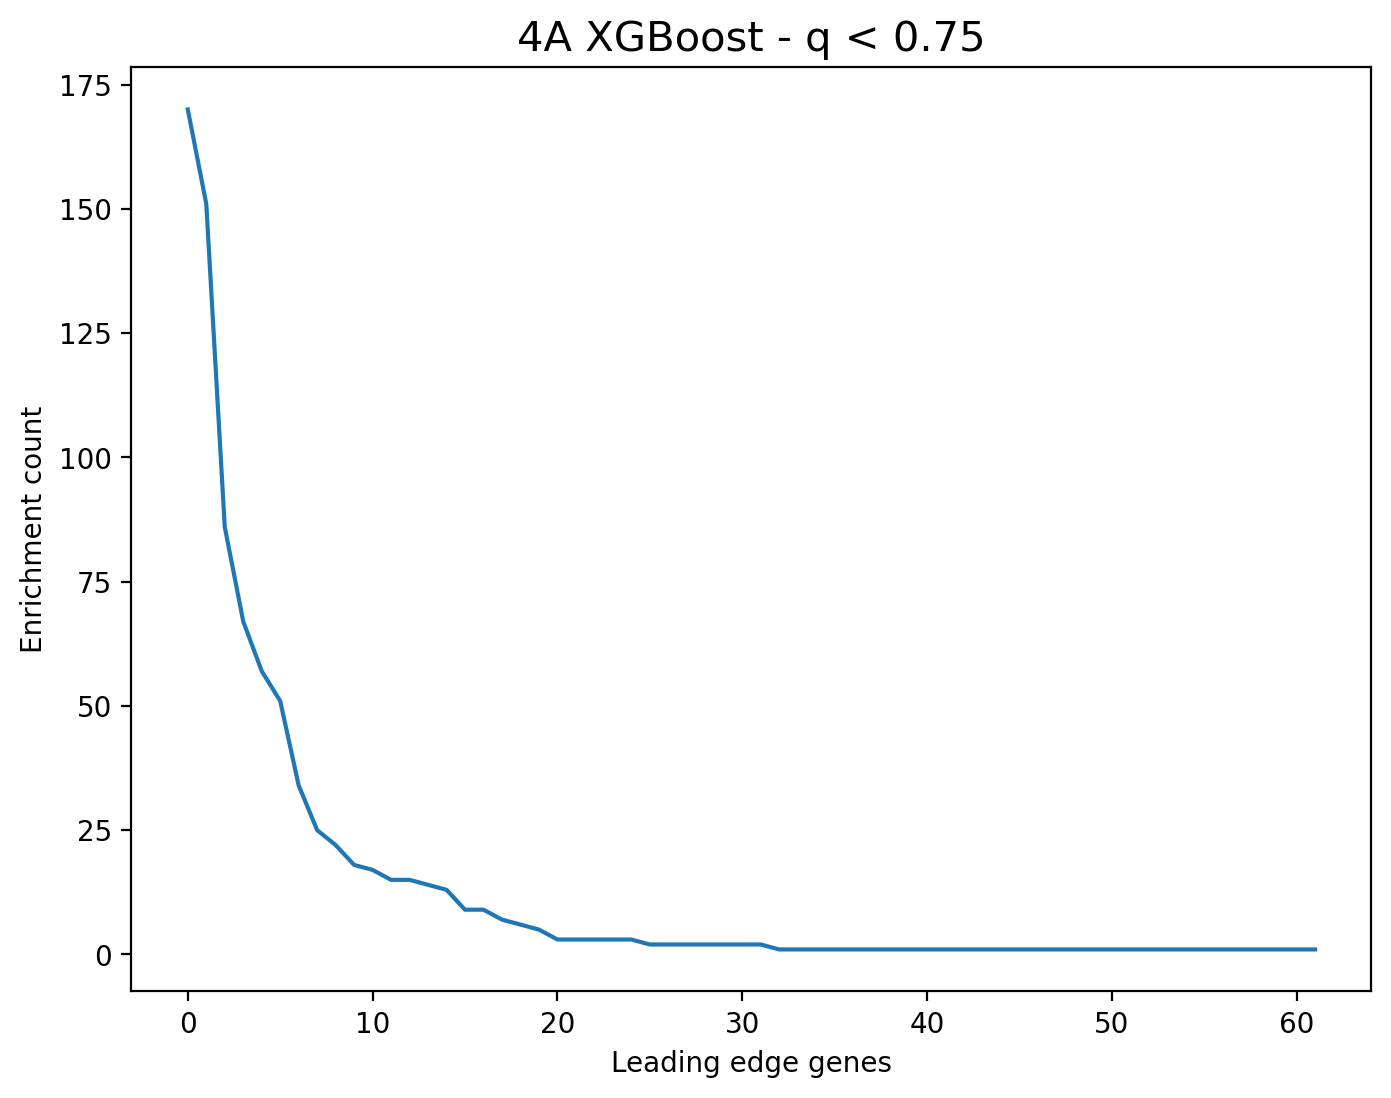

In [38]:
plt.rcParams['figure.figsize'] = (8, 6)
#plt.yscale("log") 
#set axes limit
#plt.ylim(0.001, 1000)
plt.plot(lead_genes_4Axgb_q075_KEGG_react_wiki, enrichment_count_4Axgb_q075_KEGG_react_wiki)
plt.xlabel("Leading edge genes", fontsize=10)
plt.ylabel("Enrichment count", fontsize=10)
plt.title("4A XGBoost - q < 0.75", fontsize=15)
plt.show()

In [39]:
mutated_gene_names_4A_xgb_q075_KEGG_react_wiki = occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted.index.tolist()

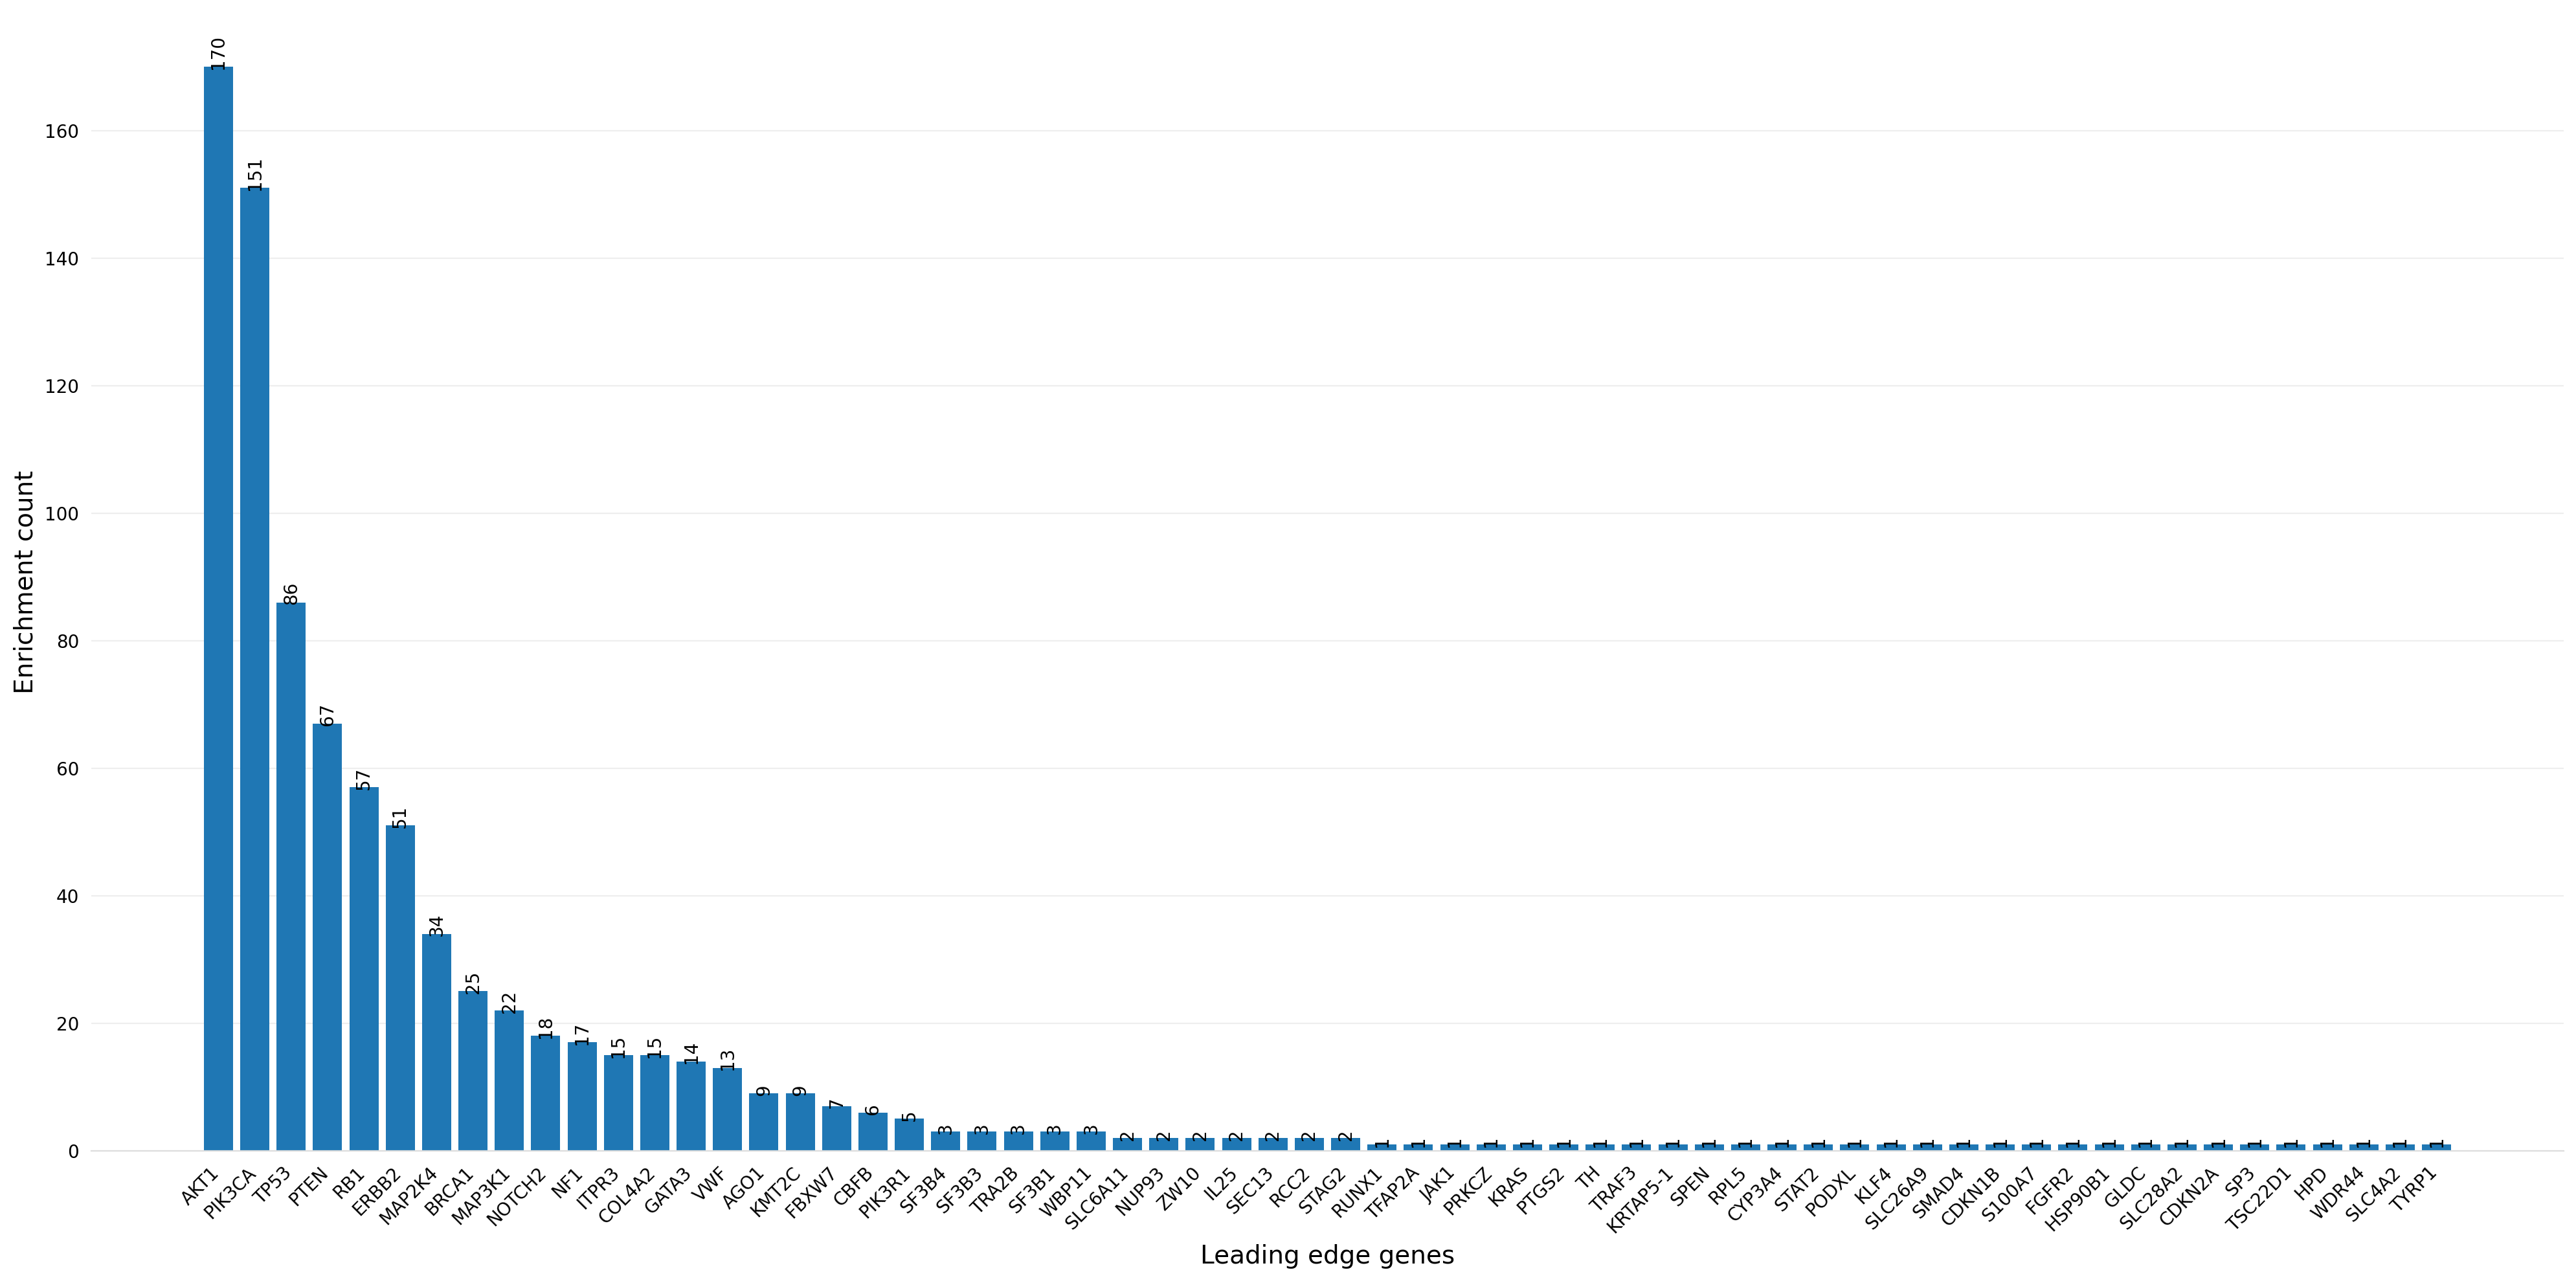

In [40]:
# increase the quality and resolution of the chart
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina', quality=100)
# set default figure size.
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
h=ax.bar(occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted.index, occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted['EnrichmentCount'], label=mutated_gene_names_4A_xgb_q075_KEGG_react_wiki)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names_4A_xgb_q075_KEGG_react_wiki,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Leading edge genes', fontsize=14)
plt.ylabel('Enrichment count', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

## Selecting the genes of higher interest

In [41]:
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted

,EnrichmentCount
BRCA1,23
NF1,18
TP53,15
VWF,12
SMG1,10
PTEN,9
MAP3K1,9
GATA3,9
AKT1,6
ITPR3,6


In [42]:
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted_SELECTED = occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted.loc[occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted['EnrichmentCount'] > 2]
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted_SELECTED

,EnrichmentCount
BRCA1,23
NF1,18
TP53,15
VWF,12
SMG1,10
PTEN,9
MAP3K1,9
GATA3,9
AKT1,6
ITPR3,6


In [43]:
# save
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted_SELECTED.to_csv('4A_enrichment_count_msigdb.txt', index=True, sep='\t')

In [44]:
occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted_SELECTED.shape

(14, 1)

In [45]:
mutated_gene_names_4A_xgb_q075_msigDB_SEL = occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted_SELECTED.index.tolist()

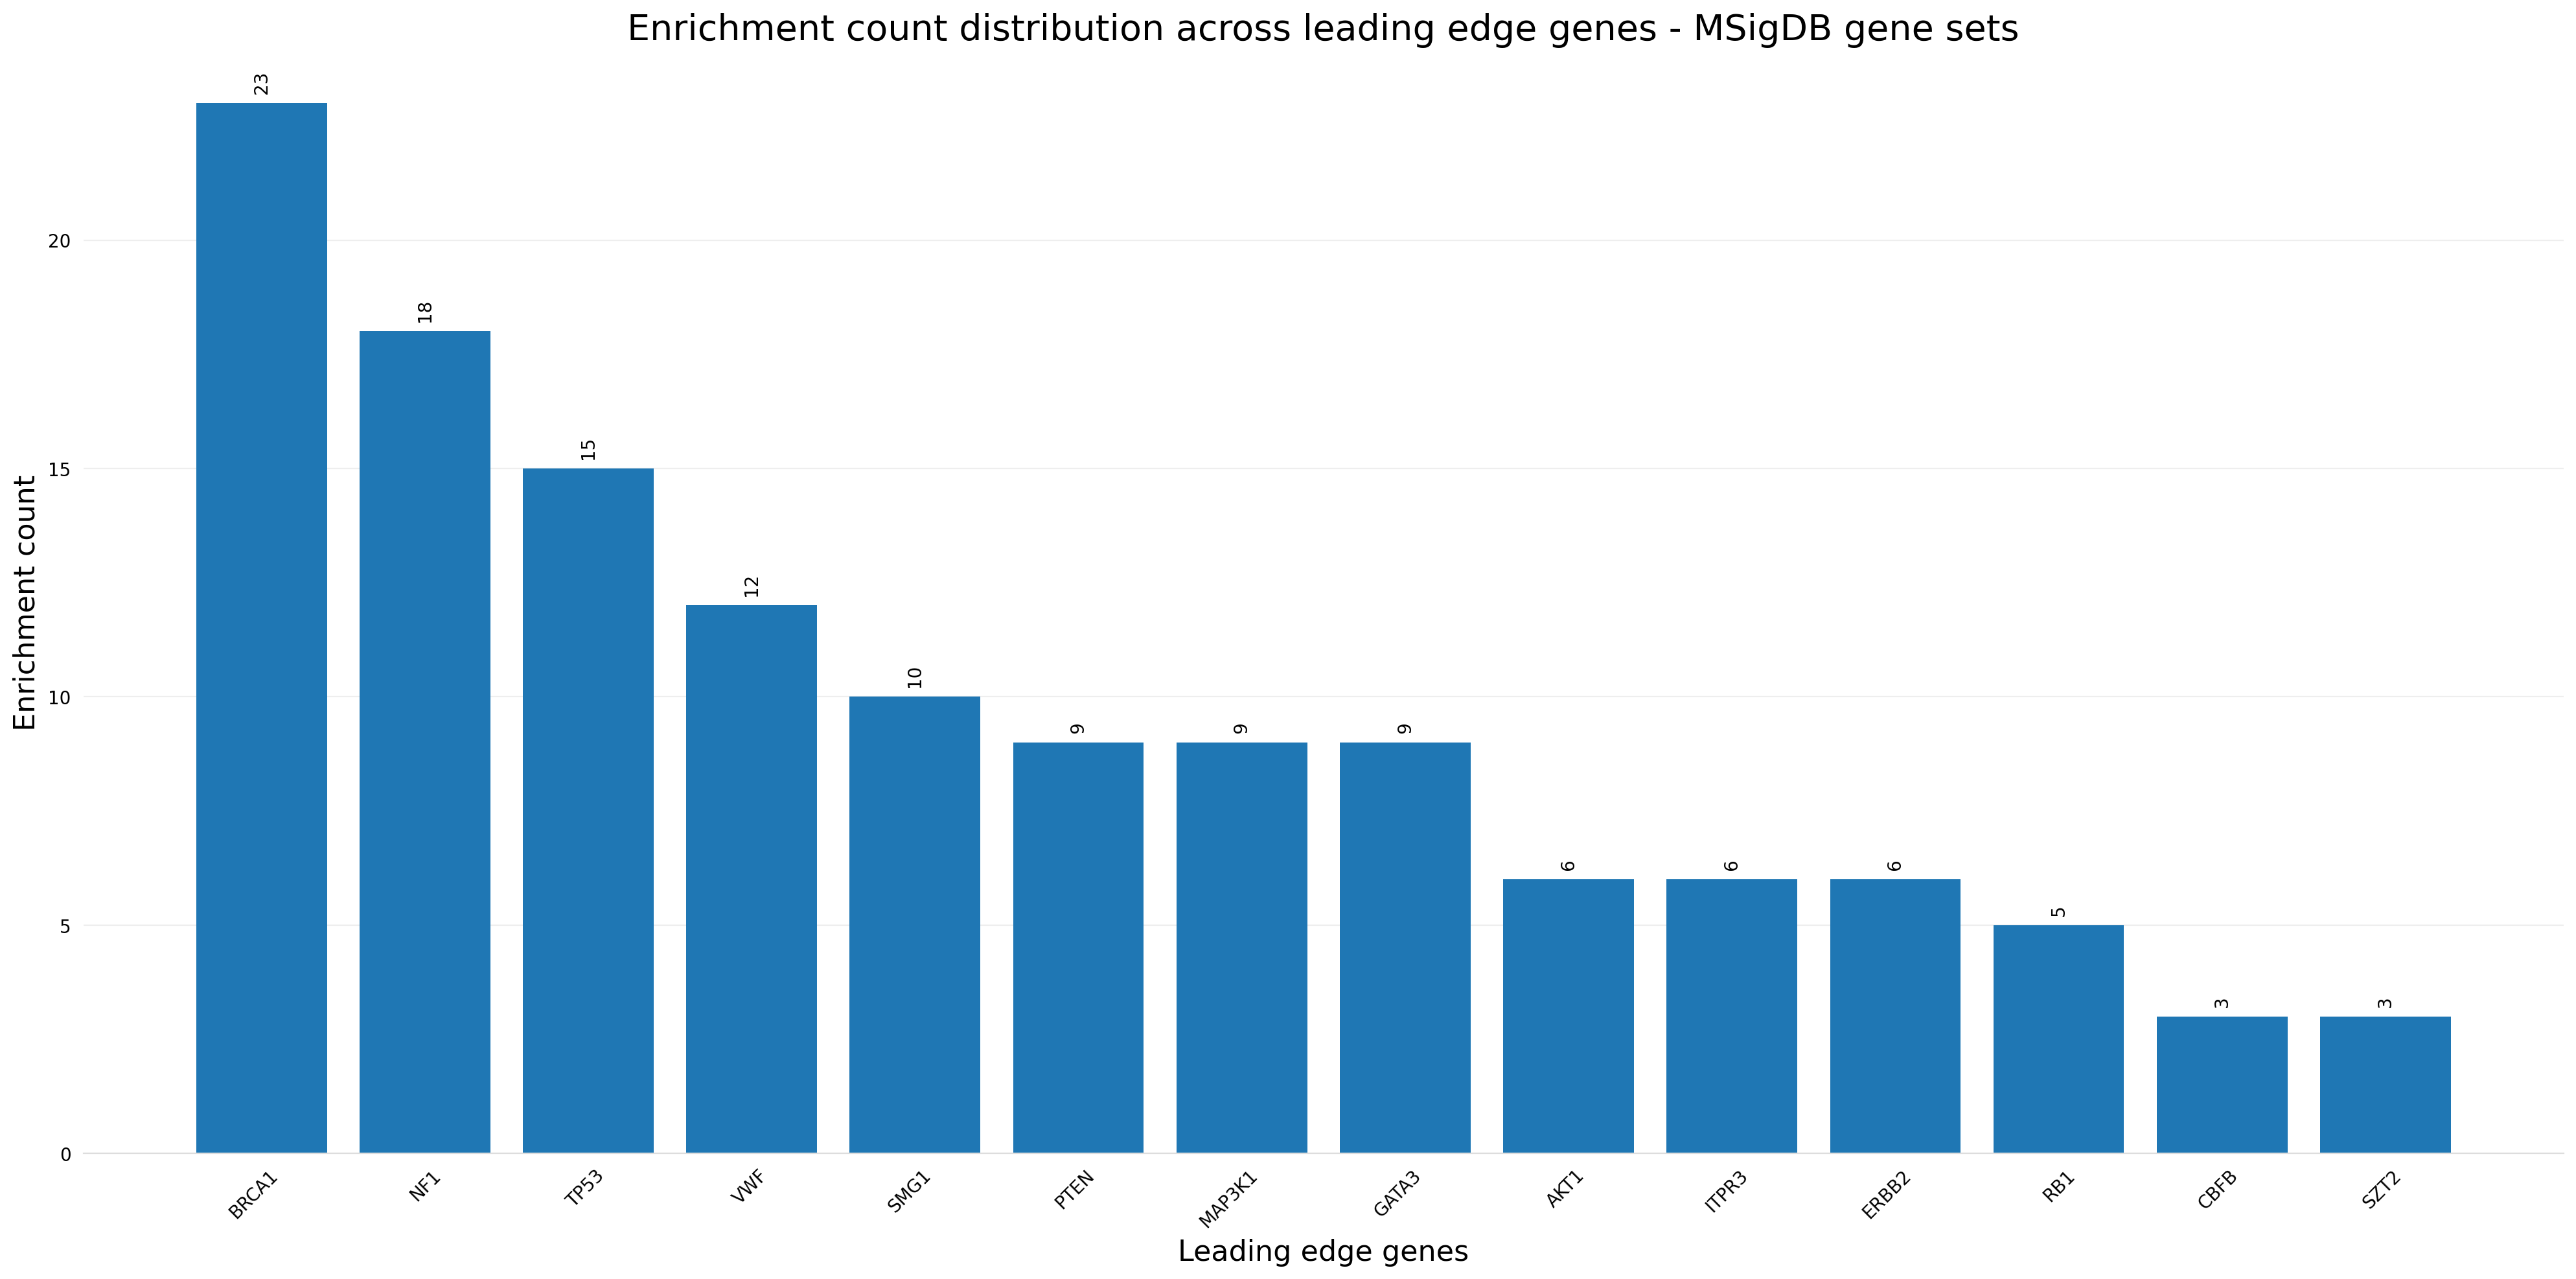

In [46]:
# increase the quality and resolution of the chart
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina', quality=100)
# set default figure size.
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
h=ax.bar(occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted_SELECTED.index, occurrence_matrix_4Axgb_q075_msigDB_genes_df_sorted_SELECTED['EnrichmentCount'], label=mutated_gene_names_4A_xgb_q075_msigDB_SEL)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names_4A_xgb_q075_msigDB_SEL,  ha='right', rotation=45)
plt.title('Enrichment count distribution across leading edge genes - MSigDB gene sets', fontsize=20)
plt.xlabel('Leading edge genes', fontsize=16)
plt.ylabel('Enrichment count', fontsize=16)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

In [47]:
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted

,EnrichmentCount
AKT1,170
PIK3CA,151
TP53,86
PTEN,67
RB1,57
...,...
TSC22D1,1
HPD,1
WDR44,1
SLC4A2,1


In [48]:
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted_SELECTED = occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted.loc[occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted['EnrichmentCount'] > 5]
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted_SELECTED

,EnrichmentCount
AKT1,170
PIK3CA,151
TP53,86
PTEN,67
RB1,57
ERBB2,51
MAP2K4,34
BRCA1,25
MAP3K1,22
NOTCH2,18


In [49]:
# save
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted_SELECTED.to_csv('4A_enrichment_count_KEGG_react_wiki_genes.txt', index=True, sep='\t')

In [50]:
occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted_SELECTED.shape

(19, 1)

In [51]:
mutated_gene_names_4A_xgb_q075_KEGG_react_wiki_SEL = occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted_SELECTED.index.tolist()

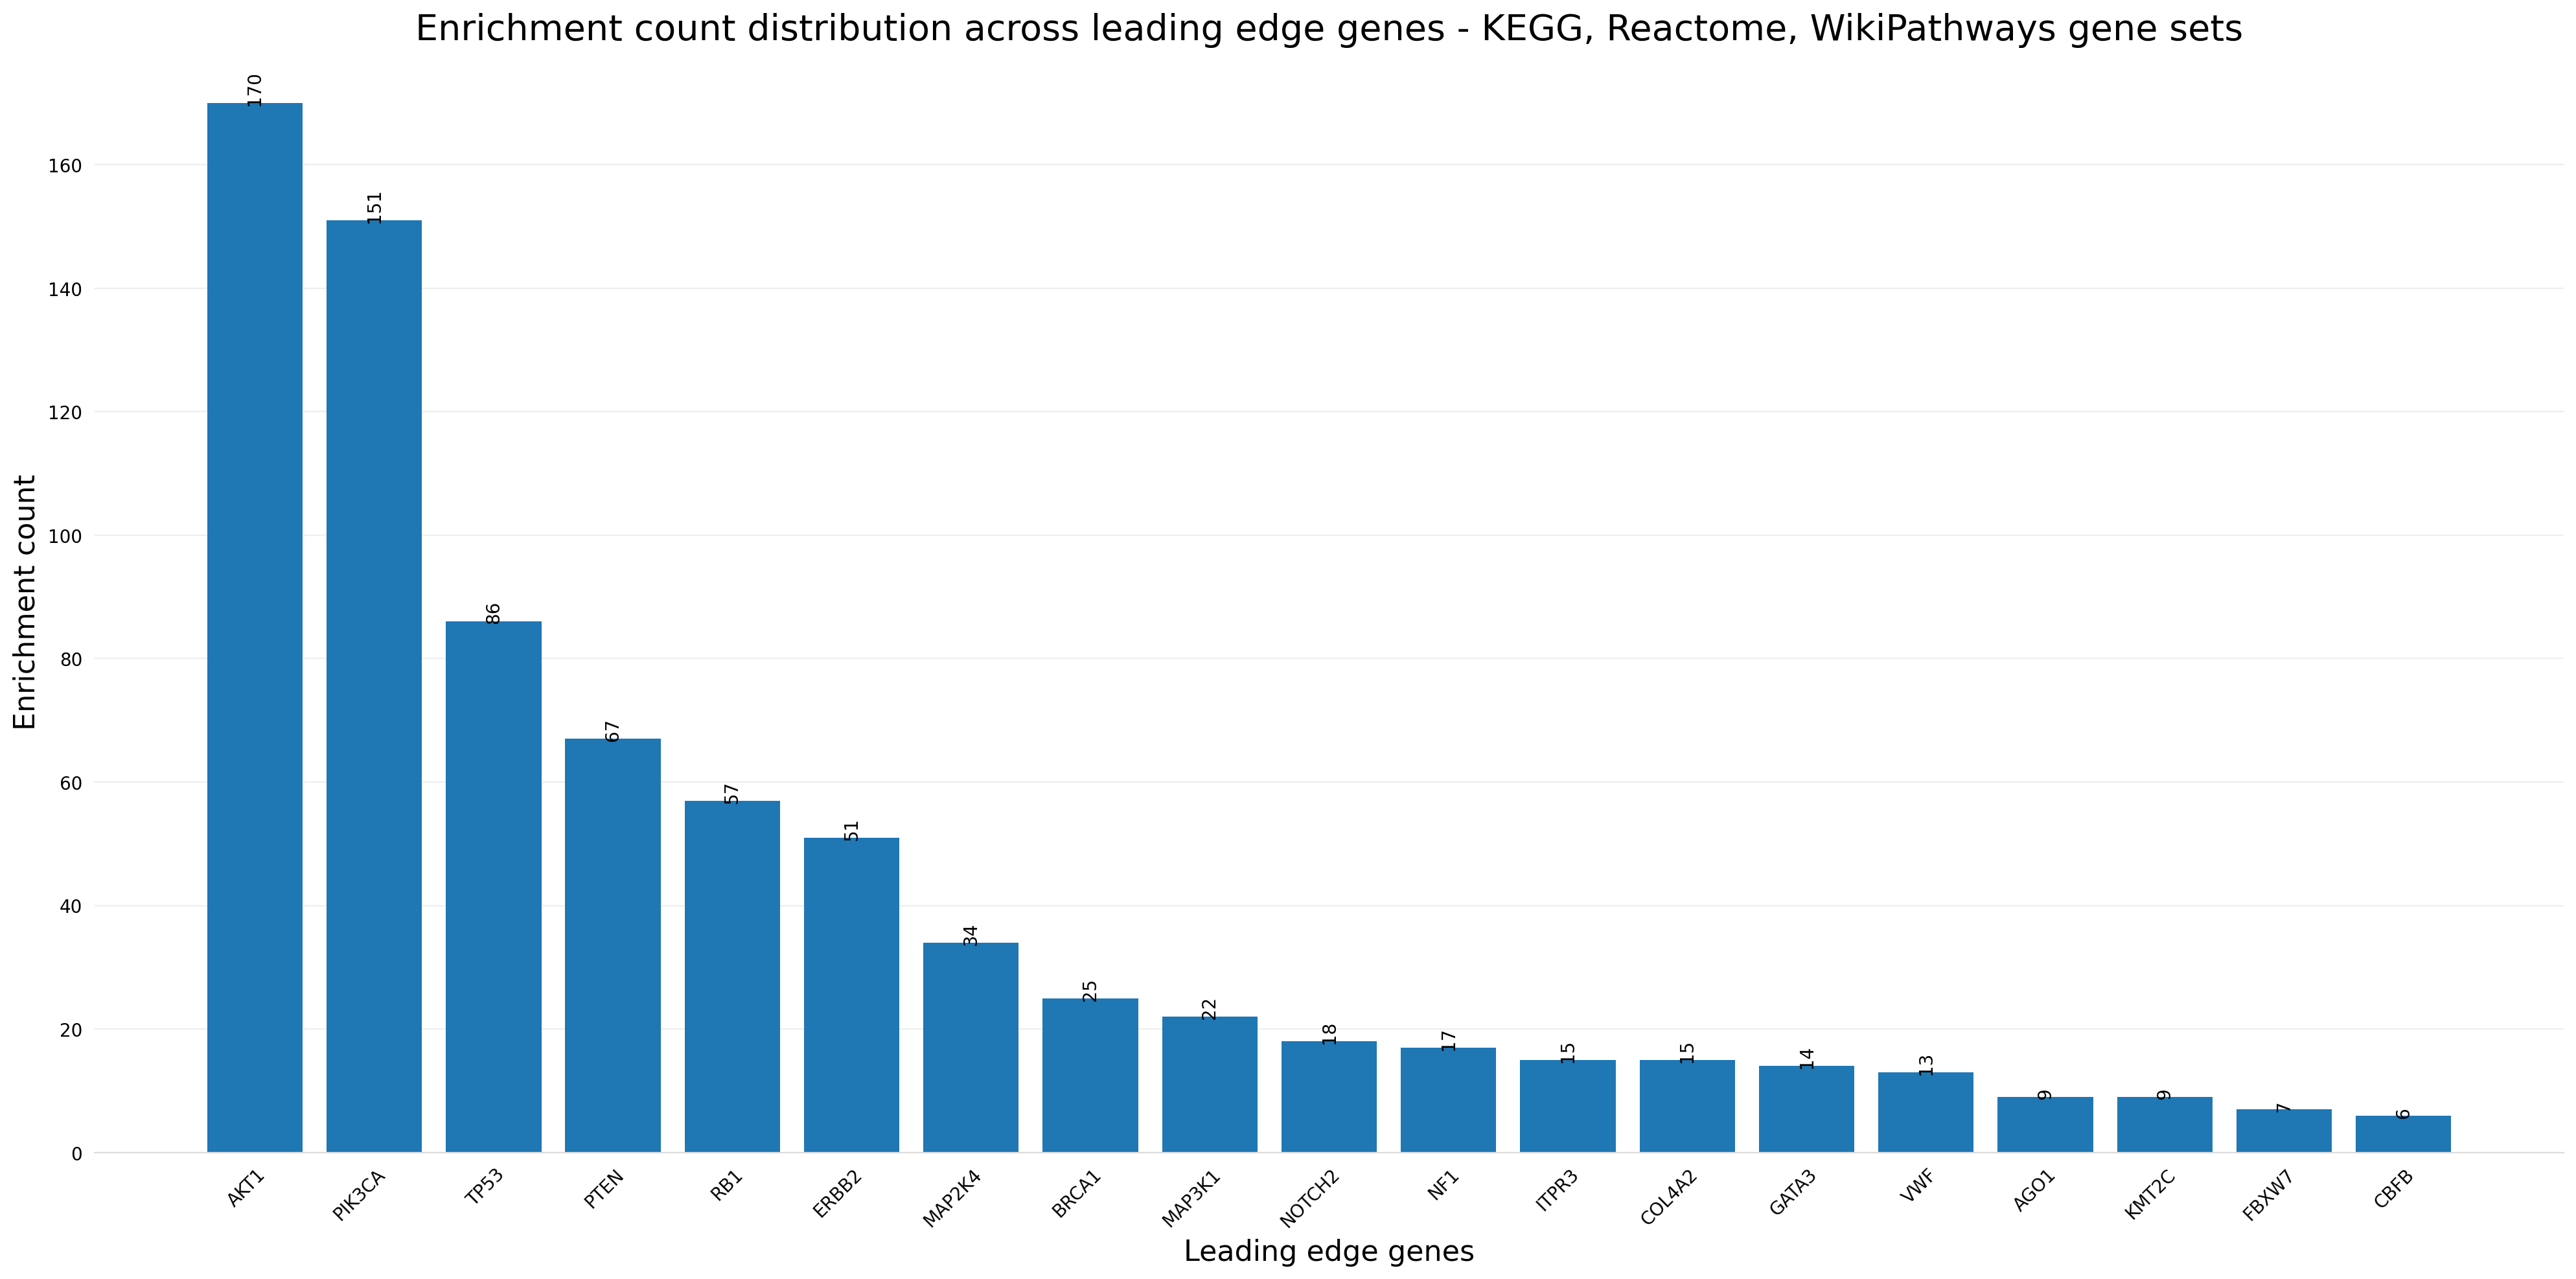

In [52]:
# increase the quality and resolution of the chart
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina', quality=100)
# set default figure size.
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
h=ax.bar(occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted_SELECTED.index, occurrence_matrix_4Axgb_q075_KEGG_react_wiki_genes_df_sorted_SELECTED['EnrichmentCount'], label=mutated_gene_names_4A_xgb_q075_KEGG_react_wiki_SEL)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names_4A_xgb_q075_KEGG_react_wiki_SEL,  ha='right', rotation=45)
plt.title('Enrichment count distribution across leading edge genes - KEGG, Reactome, WikiPathways gene sets', fontsize=20)
plt.xlabel('Leading edge genes', fontsize=16)
plt.ylabel('Enrichment count', fontsize=16)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()